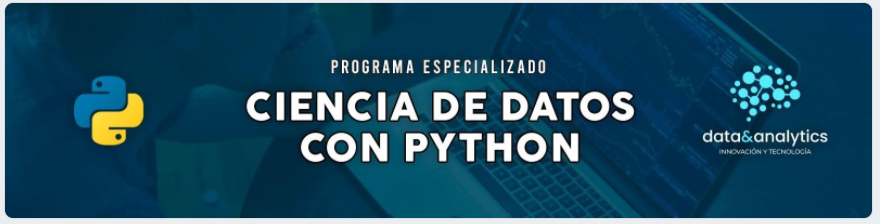

#DATA & ANALYTICS

----------------------------

...

Análisis Exploratorio de datos (EDA) - Estadística Descriptiva

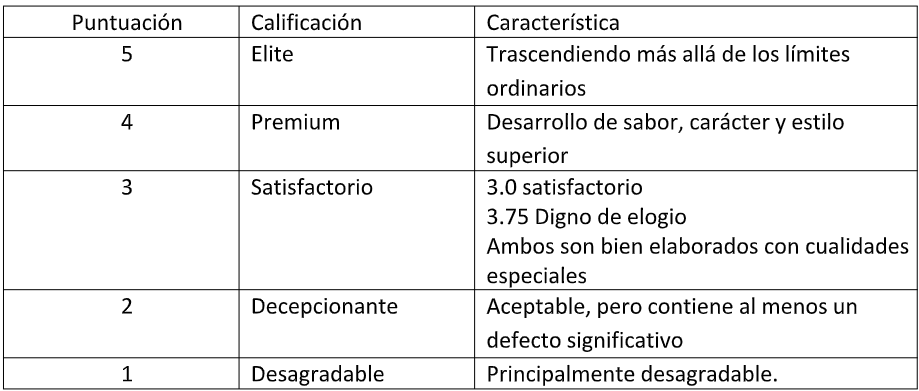

# Limpieza de datos

In [157]:
# Al tratamiento de los datos
import numpy as np
import pandas as pd

# Visualizamiento de los datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import sqrt
%matplotlib inline

# Preprocesado y modelado
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

In [2]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Proyectos_Data & Analytics/Proyecto_5/chocolate_ratings.csv')
data.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
print("La cantidad de columnas en los datos es: ",data.shape[1])
print("La cantidad de filas en los datos es: ",data.shape[0])

La cantidad de columnas en los datos es:  10
La cantidad de filas en los datos es:  2530


In [5]:
data.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

# Información de la data

* **REF:** Valor relacionado con el momento en que se ingresó la reseña en la base de
datos
* **Company:** Referencia al productor que fabrica la barra.
* **Company location:** País base del fabricante.
* **Review Date:** Año de publicación de la reseña.
* **Country of Bean Origin:** País de origen del grano de cacao.
* **Specific Bean Origin or Bar Name:** Región geográfica específica de origen de la barra.
* **Cocoa Percent:** Porcentaje de cacao (oscuridad) de la barra de chocolate que se
está revisando.
* **Ingredients:** Ingrediente que lleva la barra de chocolate.
* **Most Memorable Characteristics:** Característica más memorable de la que está compuesta la barra de chocolate.
* **Rating:** Calificación de experto para la barra de chocolate.

In [6]:
conteo_valores = data['Ingredients'].value_counts()
print(conteo_valores)

3- B,S,C          999
2- B,S            718
4- B,S,C,L        286
5- B,S,C,V,L      184
4- B,S,C,V        141
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
1- B                6
5-B,S,C,V,Sa        6
4- B,S,V,L          5
4- B,S,C,Sa         5
6-B,S,C,V,L,Sa      4
3- B,S,V            3
4- B,S*,V,L         3
4- B,S*,C,L         2
3- B,S*,Sa          1
2- B,C              1
5- B,S,C,L,Sa       1
Name: Ingredients, dtype: int64


In [7]:
data['Ingredients'] = data['Ingredients'].replace(["3- B,S,C", "2- B,S", "4- B,S,C,L", "5- B,S,C,V,L", "4- B,S,C,V", "2- B,S*", "4- B,S*,C,Sa", "3- B,S*,C", "3- B,S,L", "4- B,S*,C,V", "1- B", "5-B,S,C,V,Sa", "4- B,S,V,L", "4- B,S,C,Sa", "6-B,S,C,V,L,Sa", "3- B,S,V", "4- B,S*,V,L", "4- B,S*,C,L", "3- B,S*,Sa", "2- B,C", "5- B,S,C,L,Sa"],
                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

conteo_valores = data['Ingredients'].value_counts()
print(conteo_valores)

0.0     999
1.0     718
2.0     286
3.0     184
4.0     141
5.0      31
6.0      20
7.0      12
8.0       8
9.0       7
10.0      6
11.0      6
12.0      5
13.0      5
14.0      4
15.0      3
16.0      3
17.0      2
18.0      1
19.0      1
20.0      1
Name: Ingredients, dtype: int64


In [8]:
data['Ingredients'].mean()

1.3847728203029062

In [9]:
data["Ingredients"] = data["Ingredients"].fillna(1)

In [10]:
data['Ingredients'] = data['Ingredients'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                         ["3- B,S,C", "2- B,S", "4- B,S,C,L", "5- B,S,C,V,L", "4- B,S,C,V", "2- B,S*", "4- B,S*,C,Sa", "3- B,S*,C", "3- B,S,L", "4- B,S*,C,V", "1- B", "5-B,S,C,V,Sa", "4- B,S,V,L", "4- B,S,C,Sa", "6-B,S,C,V,L,Sa", "3- B,S,V", "4- B,S*,V,L", "4- B,S*,C,L", "3- B,S*,Sa", "2- B,C", "5- B,S,C,L,Sa"])

conteo_valores = data['Ingredients'].value_counts()
print(conteo_valores)

3- B,S,C          999
2- B,S            805
4- B,S,C,L        286
5- B,S,C,V,L      184
4- B,S,C,V        141
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
1- B                6
5-B,S,C,V,Sa        6
4- B,S,V,L          5
4- B,S,C,Sa         5
6-B,S,C,V,L,Sa      4
3- B,S,V            3
4- B,S*,V,L         3
4- B,S*,C,L         2
3- B,S*,Sa          1
2- B,C              1
5- B,S,C,L,Sa       1
Name: Ingredients, dtype: int64


In [11]:
data['Review Date'] = data['Review Date'].astype(str)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   object 
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2530 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 197.8+ KB


In [13]:
data["Cocoa Percent"] = data["Cocoa Percent"].replace(['42%', '46%', '50%', '53%', '55%', '56%', '57%', '58%', '60%', '60.5%', '61%', '62%', '63%', '64%', '65%', '66%', '67%', '68%', '69%', '70%', '71%', '71.50%', '72%', '72.5%', '73%', '73.5%', '74%', '75%', '76%', '77%', '78%', '79%', '80%', '81%', '82%', '83%', '84%', '85%', '86%', '87%', '88%', '89%', '90%', '91%', '99%', '100%'],
                     [42.0, 46.0, 50.0, 53.0, 55.0, 56.0, 57.0, 58.0, 60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 99.0, 100.0])

conteo_valores = data["Cocoa Percent"].value_counts()
print(conteo_valores)

70.0     1046
75.0      310
72.0      295
65.0       90
80.0       89
68.0       72
74.0       67
73.0       66
60.0       46
71.0       43
77.0       42
85.0       40
76.0       35
67.0       34
64.0       34
66.0       28
100.0      21
78.0       21
82.0       18
55.0       16
62.0       16
63.0       14
69.0       13
90.0        9
88.0        8
58.0        8
61.0        7
81.0        6
83.0        5
84.0        4
72.5        4
91.0        3
99.0        2
89.0        2
79.0        2
71.5        2
73.5        2
56.0        2
46.0        1
53.0        1
50.0        1
57.0        1
60.5        1
42.0        1
86.0        1
87.0        1
Name: Cocoa Percent, dtype: int64


# EDA

In [14]:
data.describe()

,REF,Cocoa Percent,Rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,71.639723,3.196344
std,757.648556,5.616724,0.445321
min,5.000000,42.000000,1.000000
25%,802.000000,70.000000,3.000000
50%,1454.000000,70.000000,3.250000
75%,2079.000000,74.000000,3.500000
max,2712.000000,100.000000,4.000000


Text(0.5, 1.0, 'Rating')

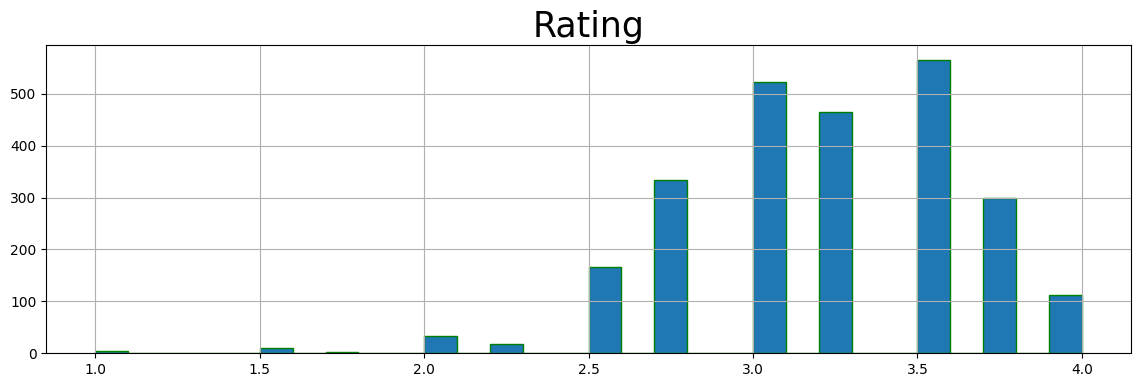

In [15]:
fig, ax = plt.subplots(figsize=(14,4))
data["Rating"].hist(bins=30, edgecolor="g")
ax.set_title("Rating", size=25)

In [16]:
# División de datos según su naturaleza
numerical_features = ['Cocoa Percent', 'Rating']
categorical_features = ['Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics']

In [37]:
number_data = data[numerical_features]

In [17]:
# Esta función va plotear un histograma
def desc_num_feature(numerical_features):
  feature_name=numerical_features
  fig, ax = plt.subplots(figsize=(10,4))
  data[feature_name].hist(bins=30, edgecolor="b")
  ax.set_title(feature_name, size=25)

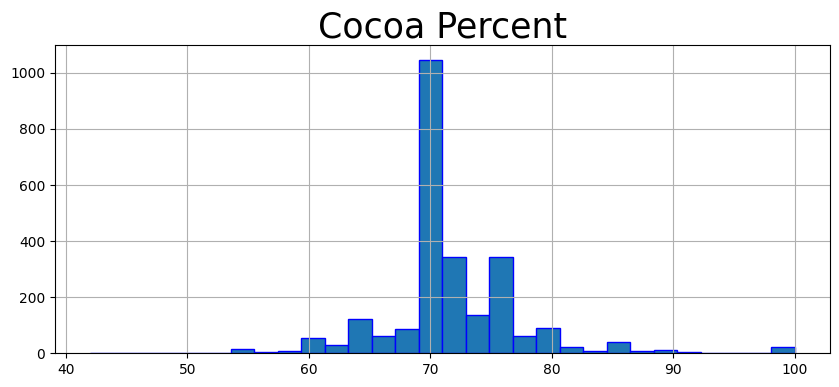

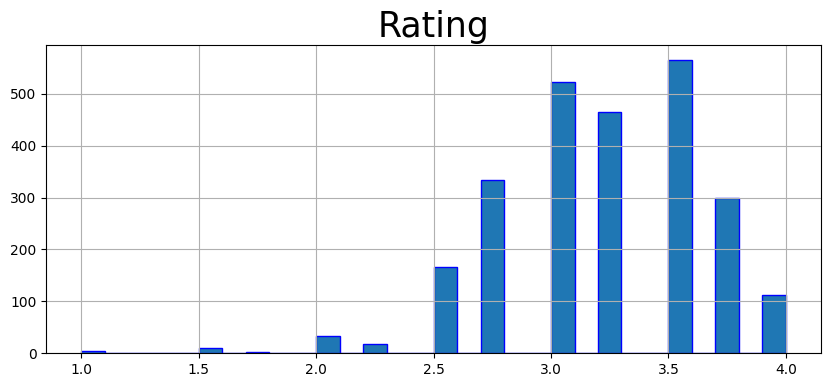

In [18]:
for x in numerical_features:
  desc_num_feature(x)

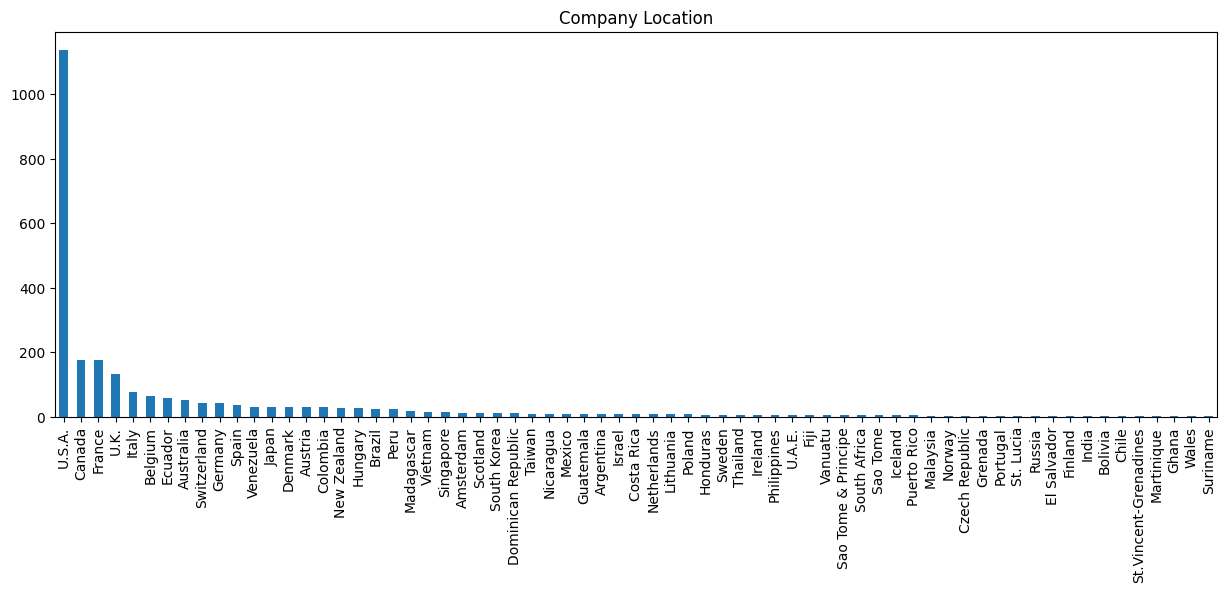

In [19]:
plt.figure(figsize=(15, 5))
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
count.plot(kind='bar', title=feature);

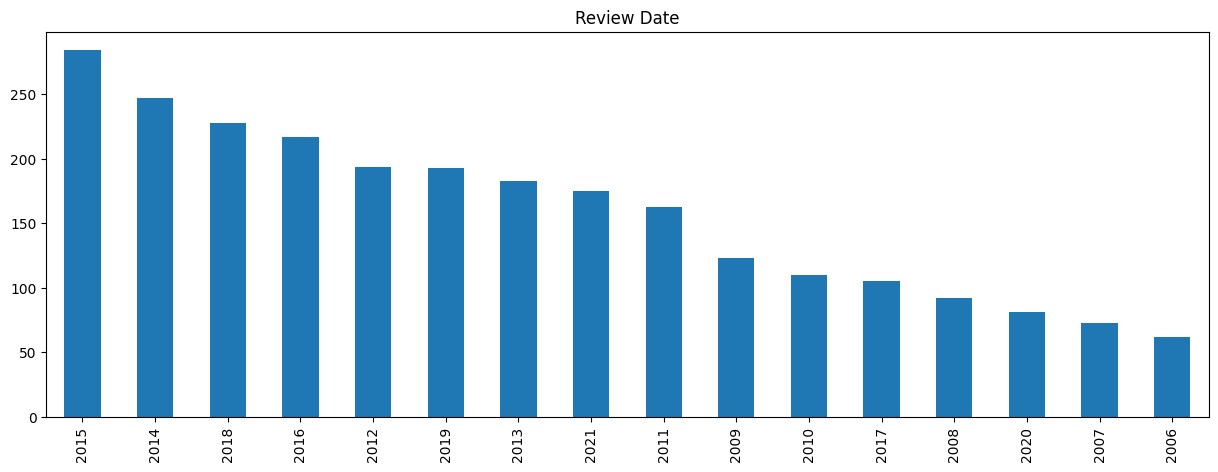

In [20]:
plt.figure(figsize=(15, 5))
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
count.plot(kind='bar', title=feature);

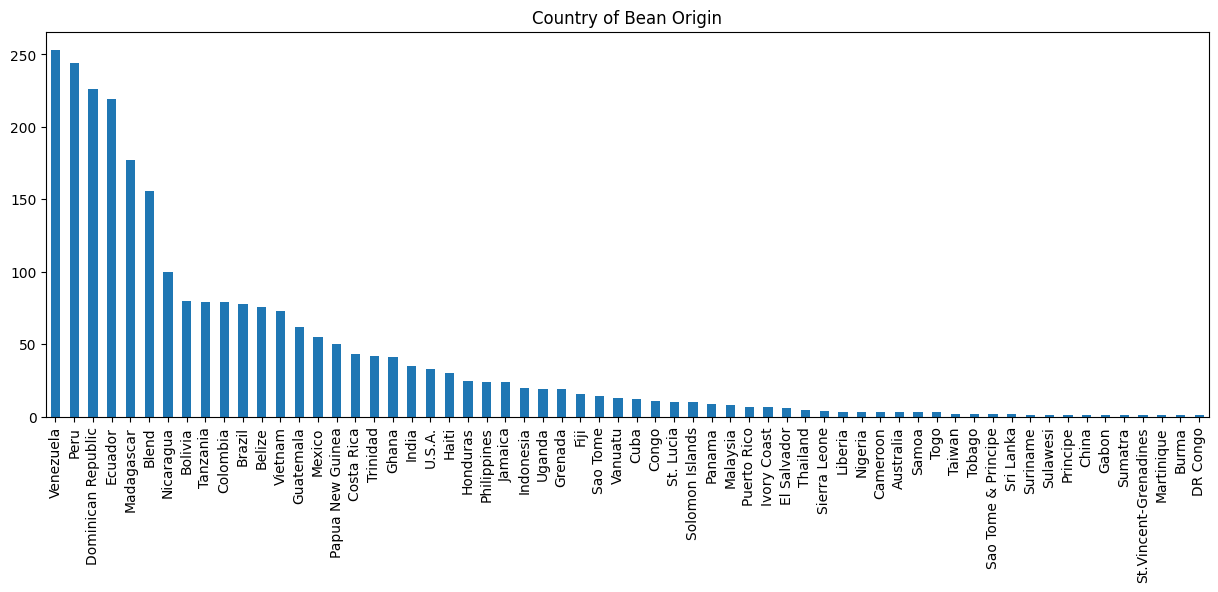

In [21]:
plt.figure(figsize=(15, 5))
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df3 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
count.plot(kind='bar', title=feature);

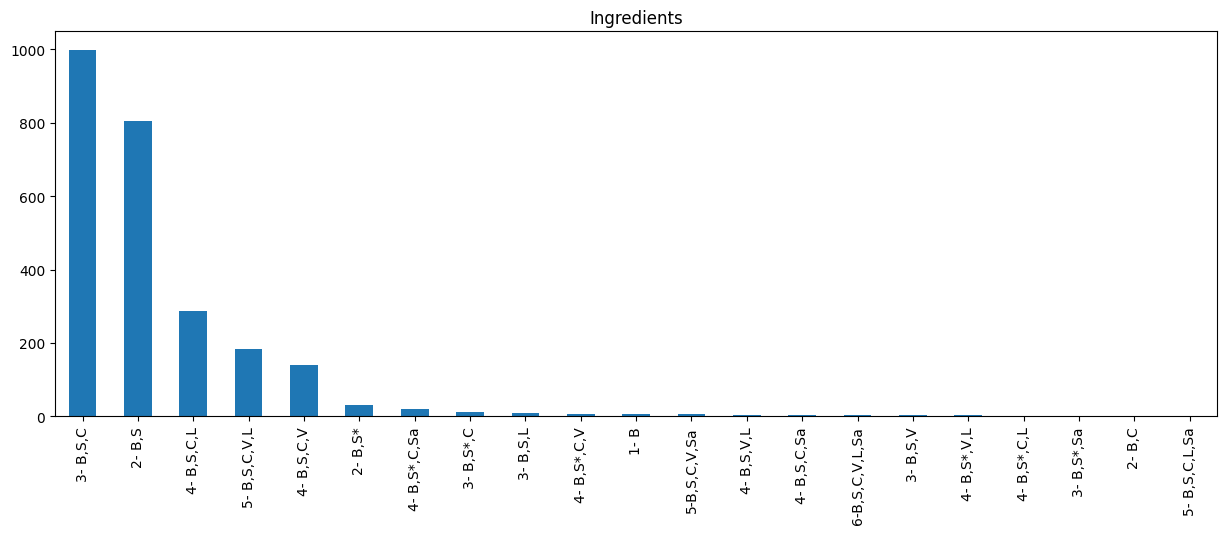

In [22]:
plt.figure(figsize=(15, 5))
feature = categorical_features[5]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df4 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
count.plot(kind='bar', title=feature);

## EDA Bivariado

---

Una vez que hemos revisado cada una de nuestras variables de manera individual, podemos ahora revisar si existen alguna relación entre algunas de las variables.


In [23]:
data

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


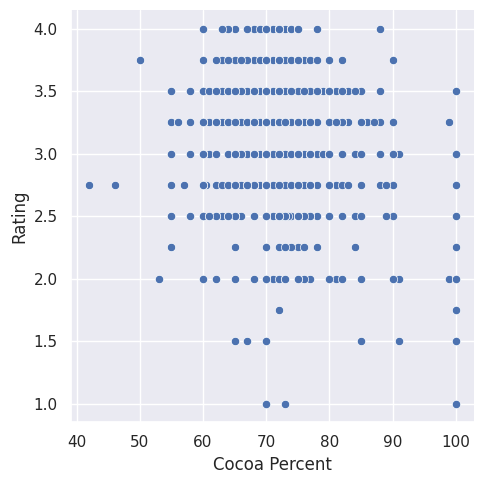

In [24]:
sns.set(style="darkgrid")
sns.relplot(x = "Cocoa Percent", y = "Rating", data = data);

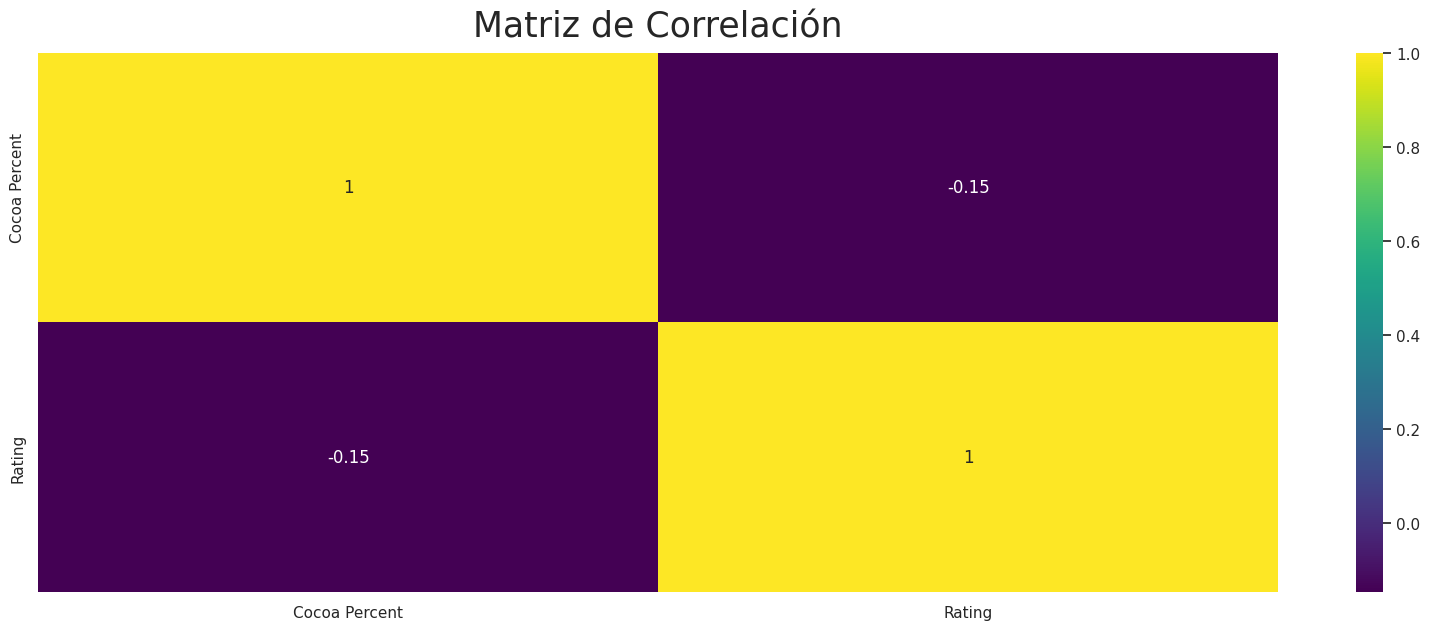

In [25]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(data[numerical_features].corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

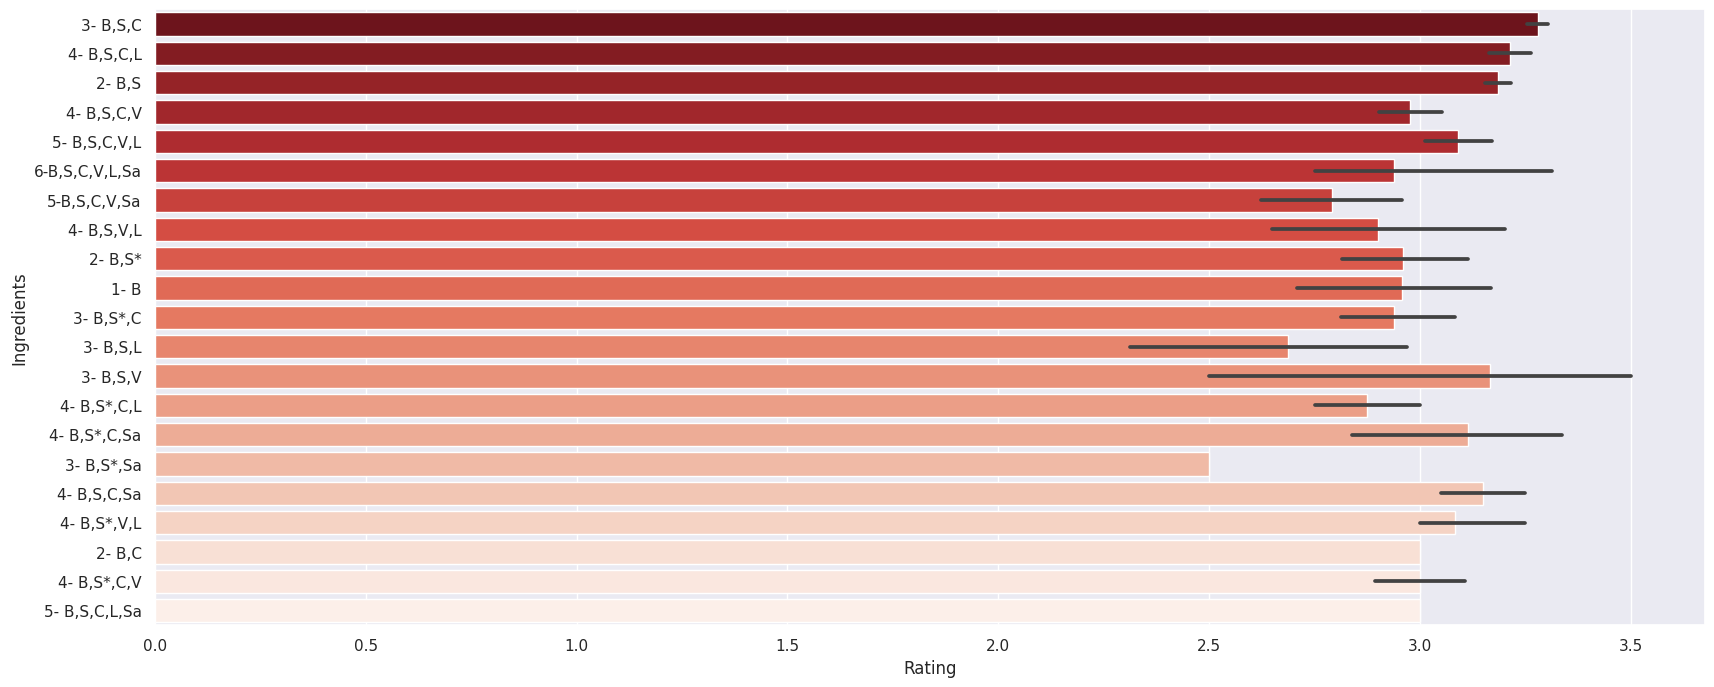

In [26]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Rating', y = 'Ingredients', data=data, palette='Reds_r')

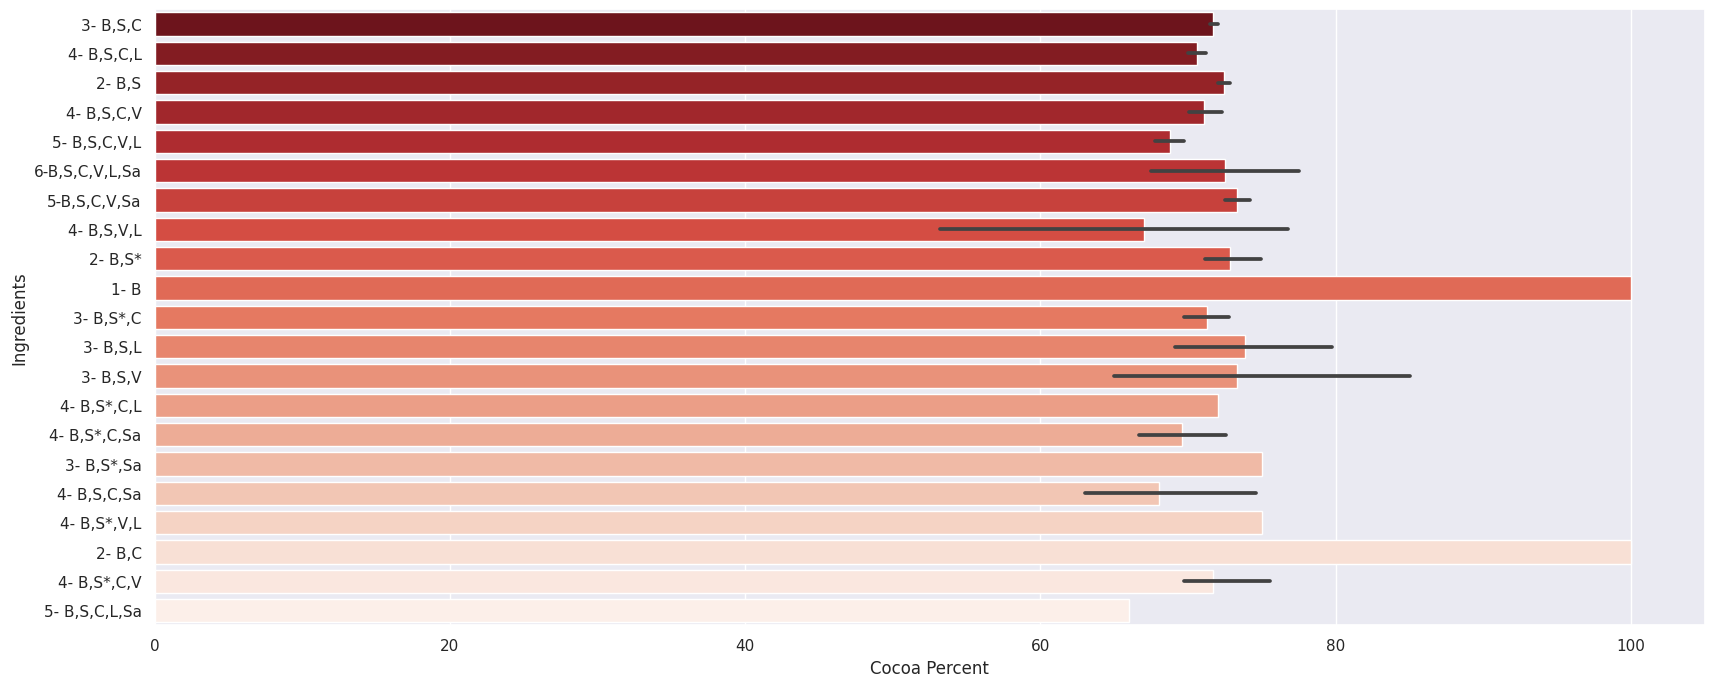

In [27]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Cocoa Percent', y = 'Ingredients', data=data, palette='Reds_r')

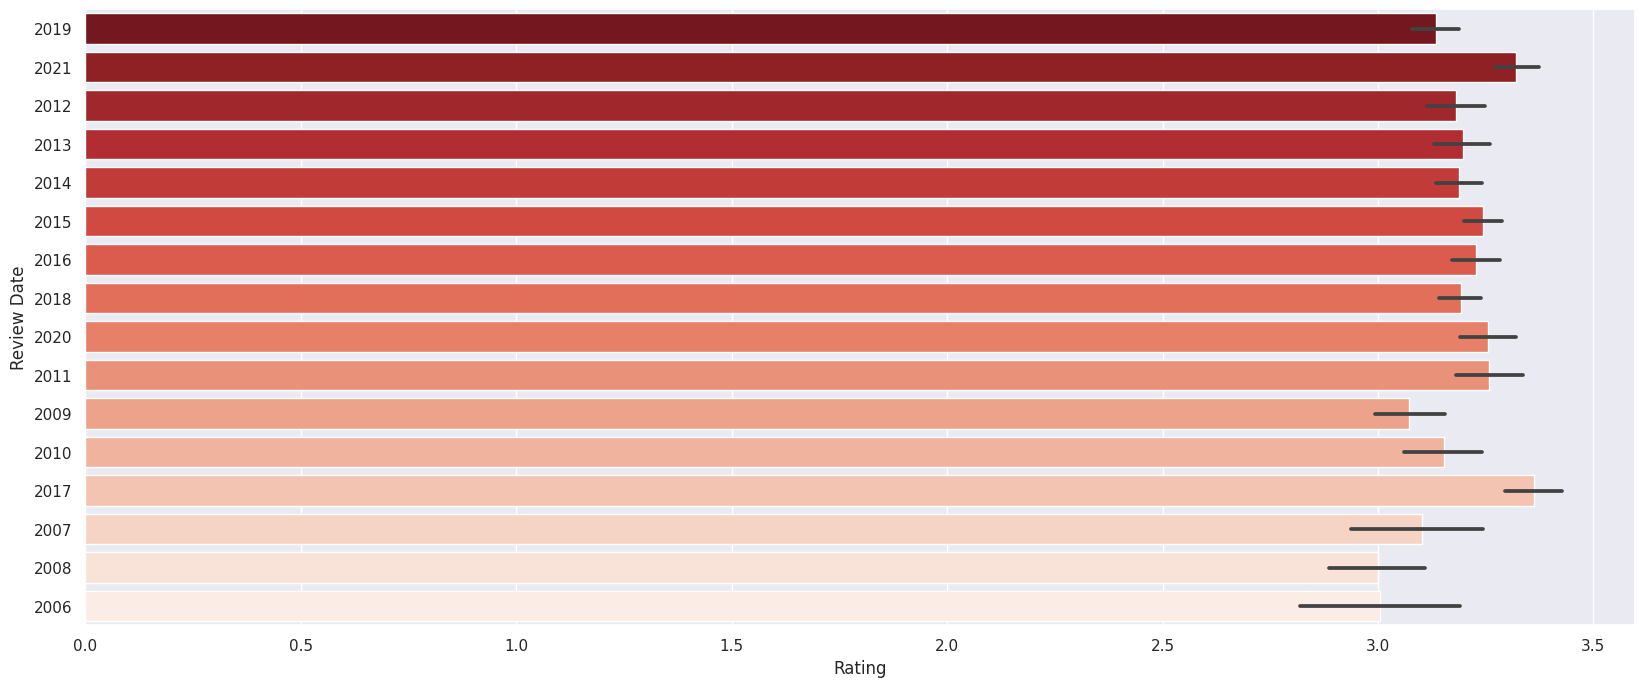

In [28]:
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.barplot(x = 'Rating', y = 'Review Date', data=data, palette='Reds_r')

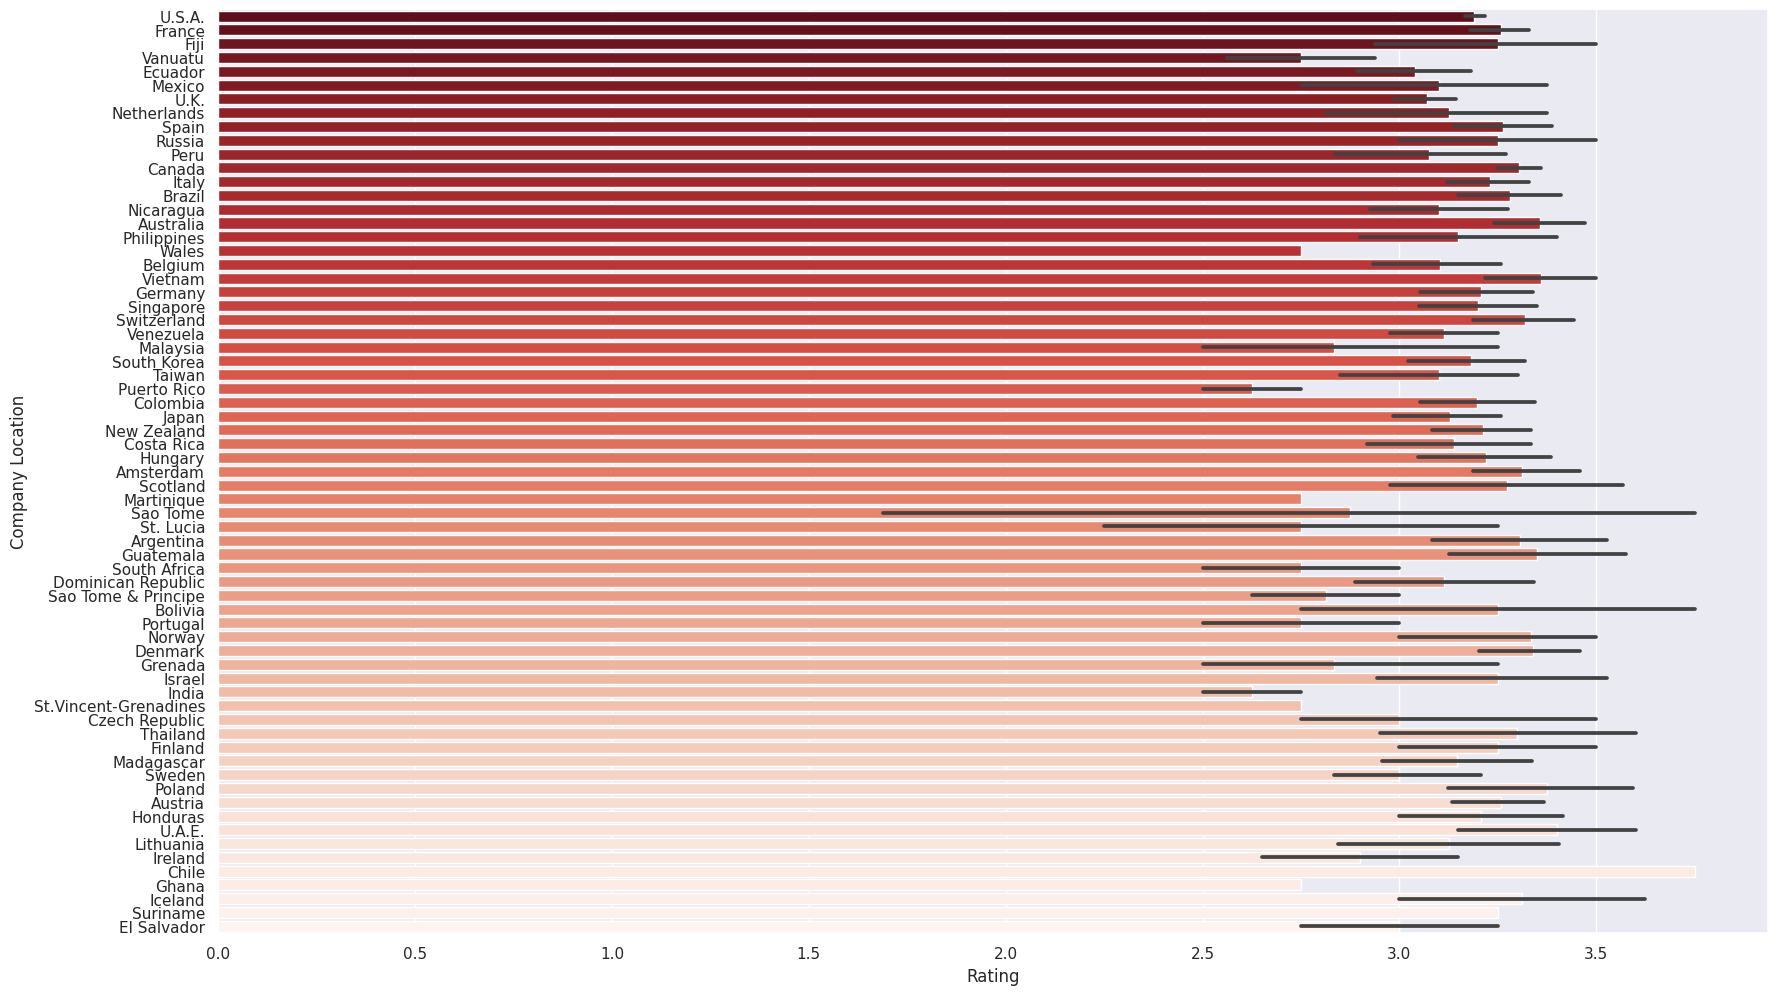

In [29]:
f, ax = plt.subplots(1,1, figsize=(20,12))
ax = sns.barplot(x = 'Rating', y = 'Company Location', data=data, palette='Reds_r')

# Modelo de aprendizaje supervisado utilizando modelos de regresión
---



...

## Regresión lineal

La regresión lineal es un modelo lineal que supone una relación lineal entre las entradas y las salidas y minimiza el costo del error entre la salida prevista y la real utilizando funciones como el error absoluto medio entre diferentes puntos de datos.

In [39]:
  X = number_data.drop(["Rating"], axis=1)
  y = data["Rating"]#Target o objetivo

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [41]:
# Llamar al objeto o función
lin_reg = LinearRegression()

#Entrenamos el modelo
regressor = lin_reg.fit(X_train, y_train)

# Hacemos de predicciones del modelo con el conjunto de prueba (Test)
y_pred_lr = regressor.predict(X_test)

In [43]:
y_pred_lr[0:9]

array([3.18400162, 3.30244622, 3.17215716, 3.1603127 , 3.1603127 ,
       3.13662378, 3.24322392, 3.219535  , 3.219535  ])

In [44]:
list(y_test[0:9])

[2.5, 3.25, 3.0, 2.75, 3.0, 3.5, 2.75, 3.0, 2.5]

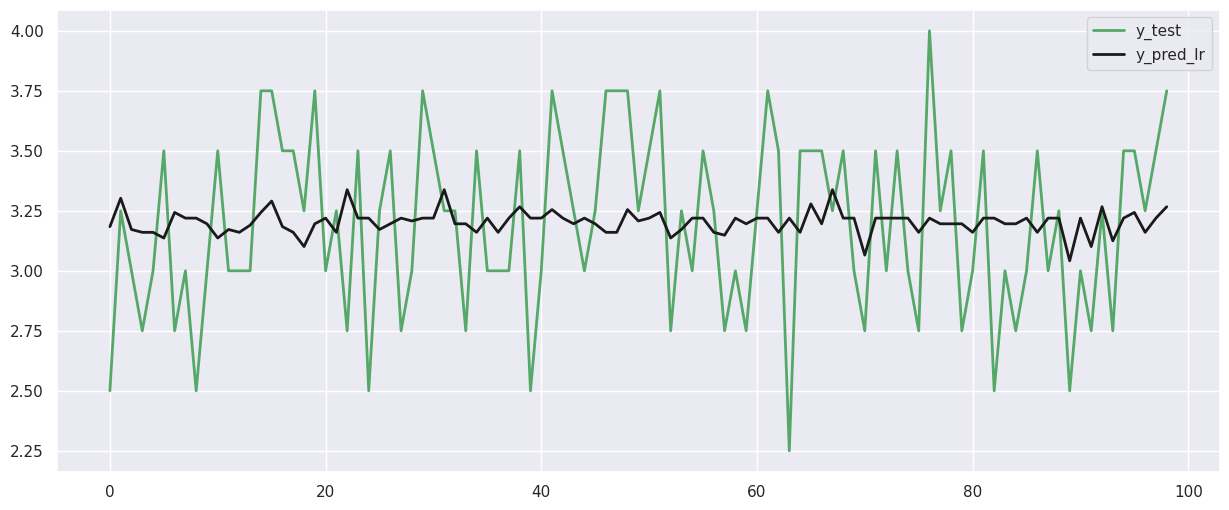

In [45]:
plt.figure(figsize=(15, 6))
#plt.scatter(list(X_train), list(y_train), c="k", label="training samples")
plt.plot(list(y_test[0:99]),  c="g", label="y_test", linewidth=2)
plt.plot(y_pred_lr[0:99], c="k", label="y_pred_lr", linewidth=2)
plt.legend(loc='best')
plt.show();

In [46]:
# The coefficients
print('Coeficientes: \n',lin_reg.coef_ )
print("--"*30)
print("Intercepto : ", lin_reg.intercept_)
print("--"*30)
list(zip(X,lin_reg.coef_) )

Coeficientes: 
 [-0.01184446]
------------------------------------------------------------
Intercepto :  4.048647227828257
------------------------------------------------------------


[('Cocoa Percent', -0.011844460379985254)]

In [47]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lr))

Mean squared error: 0.18


In [50]:
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_lr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_lr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f'% r2_score(y_test, y_pred_lr))

Mean Absolute Error: 0.3439450586394429
Mean Squared Error: 0.18473064020235597
Root Mean Squared Error: 0.42980302488739647
Coeficiente de determinación: 0.01


In [51]:
y.describe()

count    2530.000000
mean        3.196344
std         0.445321
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

## Modelo KNN para Regresión

In [56]:
# nuevo=data.sample(frac=0.7)

In [119]:
# X = nuevo.drop(["Rating"], axis=1)
# y = nuevo["Rating"]

X = data.drop(["Rating"], axis=1)
y = data["Rating"]
#visualizamos los datos
X.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready"
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory"
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery"
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky"


In [120]:
y.head()

0    3.25
1    3.50
2    3.75
3    3.00
4    3.00
Name: Rating, dtype: float64

In [121]:
#Eliminamos las variables categoricas
numerical = X.drop(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics'], axis = 1)

In [122]:
categorical = X.filter(['Review Date', 'Ingredients'])
categorical.head()

,Review Date,Ingredients
0,2019,"3- B,S,C"
1,2019,"3- B,S,C"
2,2019,"3- B,S,C"
3,2021,"3- B,S,C"
4,2021,"3- B,S,C"


In [123]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,Review Date_2007,Review Date_2008,Review Date_2009,Review Date_2010,Review Date_2011,Review Date_2012,Review Date_2013,Review Date_2014,Review Date_2015,Review Date_2016,Review Date_2017,Review Date_2018,Review Date_2019,Review Date_2020,Review Date_2021,"Ingredients_2- B,C","Ingredients_2- B,S","Ingredients_2- B,S*","Ingredients_3- B,S*,C","Ingredients_3- B,S*,Sa","Ingredients_3- B,S,C","Ingredients_3- B,S,L","Ingredients_3- B,S,V","Ingredients_4- B,S*,C,L","Ingredients_4- B,S*,C,Sa","Ingredients_4- B,S*,C,V","Ingredients_4- B,S*,V,L","Ingredients_4- B,S,C,L","Ingredients_4- B,S,C,Sa","Ingredients_4- B,S,C,V","Ingredients_4- B,S,V,L","Ingredients_5- B,S,C,L,Sa","Ingredients_5- B,S,C,V,L","Ingredients_5-B,S,C,V,Sa","Ingredients_6-B,S,C,V,L,Sa"
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,Cocoa Percent,Review Date_2007,Review Date_2008,Review Date_2009,Review Date_2010,Review Date_2011,Review Date_2012,Review Date_2013,Review Date_2014,Review Date_2015,Review Date_2016,Review Date_2017,Review Date_2018,Review Date_2019,Review Date_2020,Review Date_2021,"Ingredients_2- B,C","Ingredients_2- B,S","Ingredients_2- B,S*","Ingredients_3- B,S*,C","Ingredients_3- B,S*,Sa","Ingredients_3- B,S,C","Ingredients_3- B,S,L","Ingredients_3- B,S,V","Ingredients_4- B,S*,C,L","Ingredients_4- B,S*,C,Sa","Ingredients_4- B,S*,C,V","Ingredients_4- B,S*,V,L","Ingredients_4- B,S,C,L","Ingredients_4- B,S,C,Sa","Ingredients_4- B,S,C,V","Ingredients_4- B,S,V,L","Ingredients_5- B,S,C,L,Sa","Ingredients_5- B,S,C,V,L","Ingredients_5-B,S,C,V,Sa","Ingredients_6-B,S,C,V,L,Sa"
0,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)
#llamo al objeto o a la función
KNN_reg = KNeighborsRegressor(n_neighbors=5)
# Entrenamiento de lo modelo
regressor = KNN_reg.fit(X_train, y_train)
#Predición de modelo
y_pred_knn = regressor.predict(X_test)

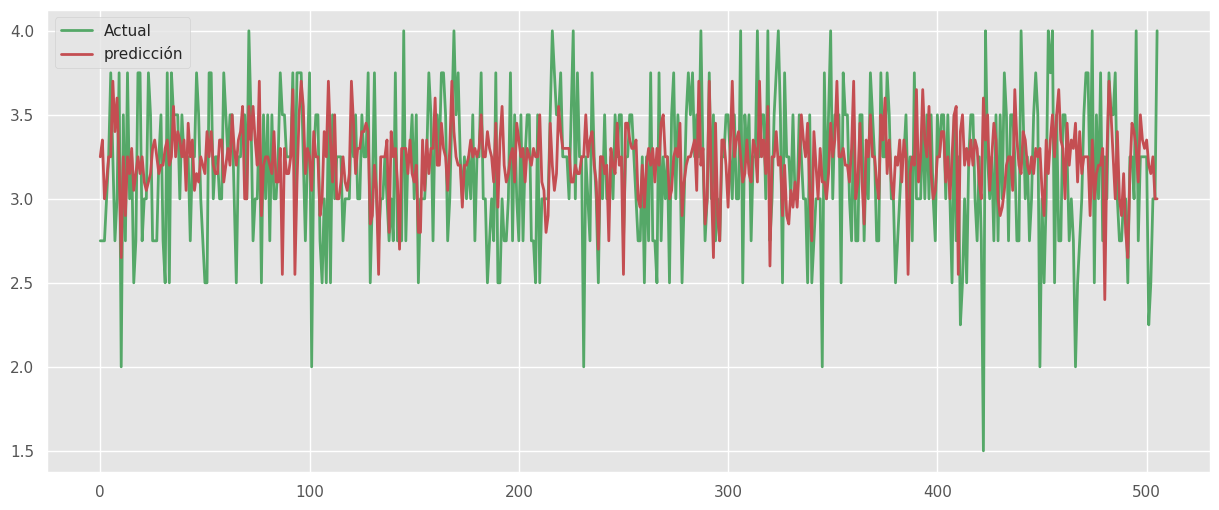

In [127]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="g", label="Actual", linewidth=2)
plt.plot(y_pred_knn[0:1000], c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

In [128]:
# The mean squared error

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_knn))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_knn))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_knn))

Mean Absolute Error: 0.341501976284585
Mean Squared Error: 0.18397233201581026
Root Mean Squared Error: 0.42891995991771037
Coefficient of determination: -0.05


In [129]:
rmse_val = [] #para almacenar valores rmse para diferentes k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #hacer predicciones en el equipo de prueba
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('Valor de RMSE para k= ' , K , 'es:', error)

Valor de RMSE para k=  1 es: 0.5619919752426668
Valor de RMSE para k=  2 es: 0.4860009129124951
Valor de RMSE para k=  3 es: 0.442372407037966
Valor de RMSE para k=  4 es: 0.4368731392774502
Valor de RMSE para k=  5 es: 0.42891995991771037
Valor de RMSE para k=  6 es: 0.4329770439103668
Valor de RMSE para k=  7 es: 0.42932951021979315
Valor de RMSE para k=  8 es: 0.4256811633326116
Valor de RMSE para k=  9 es: 0.42121836781538663
Valor de RMSE para k=  10 es: 0.4225881927271644
Valor de RMSE para k=  11 es: 0.42116349219637983
Valor de RMSE para k=  12 es: 0.42014563751081313
Valor de RMSE para k=  13 es: 0.4216501758901192
Valor de RMSE para k=  14 es: 0.417595124576059
Valor de RMSE para k=  15 es: 0.4198854592125651
Valor de RMSE para k=  16 es: 0.41936803158769403
Valor de RMSE para k=  17 es: 0.42057260601517926
Valor de RMSE para k=  18 es: 0.4208593586819381
Valor de RMSE para k=  19 es: 0.42054443926033946
Valor de RMSE para k=  20 es: 0.4208818000632789


Text(0, 0.5, 'Error Rate')

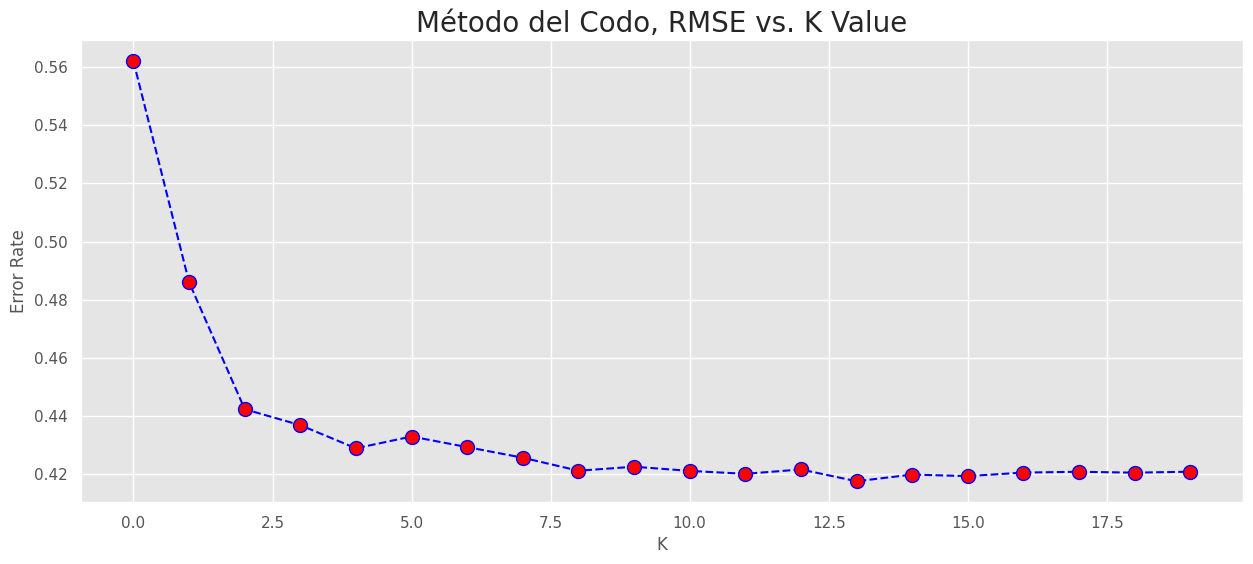

In [130]:
plt.style.use('ggplot')

plt.figure(figsize=(15,6))
plt.plot(rmse_val ,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title('Método del Codo, RMSE vs. K Value', size=20)
plt.xlabel('K')
plt.ylabel('Error Rate')

## Support Vector Regresión

In [131]:
# oi=data.sample(frac=0.5)
# X = oi.drop(["Rating"], axis=1)
# y = oi["Rating"]

X = data.drop(["Rating"], axis=1)
y = data["Rating"]

#visualizamos los datos
X.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready"
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory"
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery"
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky"


In [132]:
# Eliminamos las variables categoricas
numerical = X.drop(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics'], axis = 1)
# Variable categoricas
categorical = X.filter(['Review Date', 'Ingredients'])

In [133]:
cat_numerical = pd.get_dummies(categorical,drop_first=True)
cat_numerical.head()

,Review Date_2007,Review Date_2008,Review Date_2009,Review Date_2010,Review Date_2011,Review Date_2012,Review Date_2013,Review Date_2014,Review Date_2015,Review Date_2016,Review Date_2017,Review Date_2018,Review Date_2019,Review Date_2020,Review Date_2021,"Ingredients_2- B,C","Ingredients_2- B,S","Ingredients_2- B,S*","Ingredients_3- B,S*,C","Ingredients_3- B,S*,Sa","Ingredients_3- B,S,C","Ingredients_3- B,S,L","Ingredients_3- B,S,V","Ingredients_4- B,S*,C,L","Ingredients_4- B,S*,C,Sa","Ingredients_4- B,S*,C,V","Ingredients_4- B,S*,V,L","Ingredients_4- B,S,C,L","Ingredients_4- B,S,C,Sa","Ingredients_4- B,S,C,V","Ingredients_4- B,S,V,L","Ingredients_5- B,S,C,L,Sa","Ingredients_5- B,S,C,V,L","Ingredients_5-B,S,C,V,Sa","Ingredients_6-B,S,C,V,L,Sa"
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
X = pd.concat([numerical, cat_numerical], axis = 1)
X.head()

,Cocoa Percent,Review Date_2007,Review Date_2008,Review Date_2009,Review Date_2010,Review Date_2011,Review Date_2012,Review Date_2013,Review Date_2014,Review Date_2015,Review Date_2016,Review Date_2017,Review Date_2018,Review Date_2019,Review Date_2020,Review Date_2021,"Ingredients_2- B,C","Ingredients_2- B,S","Ingredients_2- B,S*","Ingredients_3- B,S*,C","Ingredients_3- B,S*,Sa","Ingredients_3- B,S,C","Ingredients_3- B,S,L","Ingredients_3- B,S,V","Ingredients_4- B,S*,C,L","Ingredients_4- B,S*,C,Sa","Ingredients_4- B,S*,C,V","Ingredients_4- B,S*,V,L","Ingredients_4- B,S,C,L","Ingredients_4- B,S,C,Sa","Ingredients_4- B,S,C,V","Ingredients_4- B,S,V,L","Ingredients_5- B,S,C,L,Sa","Ingredients_5- B,S,C,V,L","Ingredients_5-B,S,C,V,Sa","Ingredients_6-B,S,C,V,L,Sa"
0,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

svm_reg = svm.SVR()

# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)

# Haciendo la predicciones
y_pred_svr = regressor.predict(X_test)

In [136]:
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_svr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_svr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_svr))

Mean Absolute Error: 0.34049897809515983
Mean Squared Error: 0.17872459746301744
Root Mean Squared Error: 0.42275832039478234
Coefficient of determination: -0.02


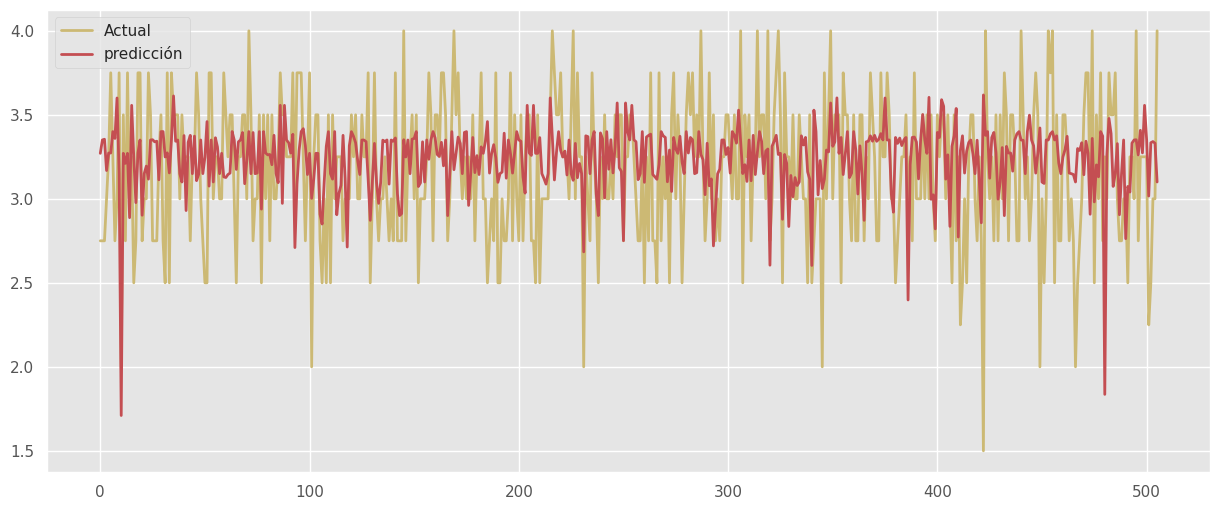

In [137]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_svr, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## Árbol de Decisión

In [138]:
dec_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = 10,
                                     min_samples_leaf = 10
                                     )

dtr = dec_tree_reg.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_dtr))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_dtr))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_dtr))

Mean Absolute Error: 0.3254774820183769
Mean Squared Error: 0.16130629321906856
Root Mean Squared Error: 0.4016295472435619
Coefficient of determination: 0.08


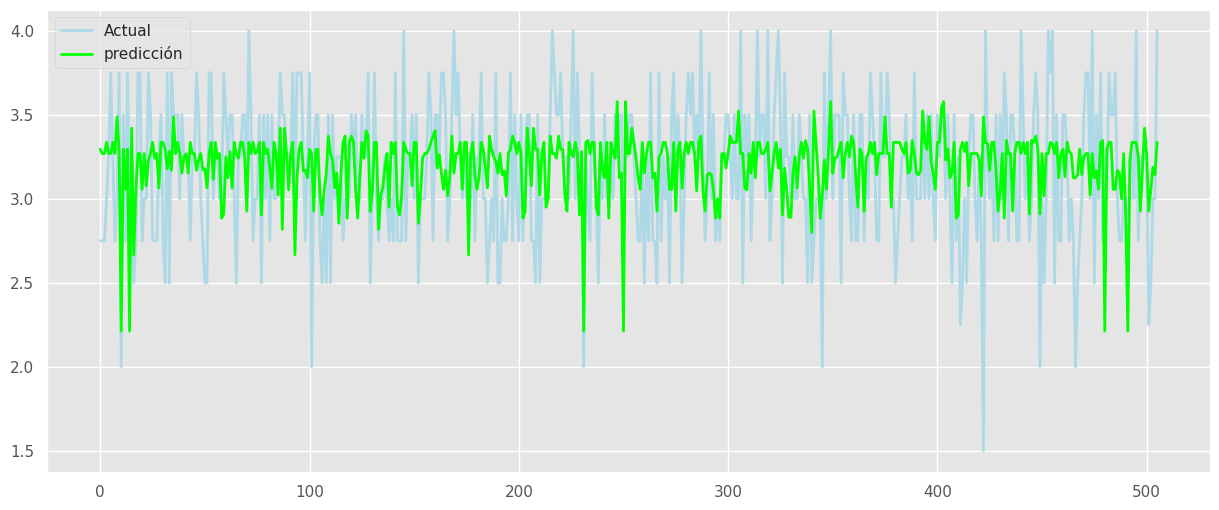

In [140]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test.iloc[0:1000]),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_dtr[0:1000], c="lime", label="predicción", linewidth=2)

plt.legend(loc='best')
plt.show();

## Random Forest Regresión

In [115]:
X = data.drop(["Rating"], axis=1)
y = data["Rating"]

# Eliminamos las variables categoricas
numerical = X.drop(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics'], axis = 1)
# Variable categoricas
categorical = X.filter(['Review Date', 'Ingredients'])

cat_numerical = pd.get_dummies(categorical,drop_first=True)

X = pd.concat([numerical, cat_numerical], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

#cargamos la función
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)#500 árboles

#Entrenamos el modelo
regressor = rf_reg.fit(X_train, y_train)

#Hacemos las predicciones
y_pred_rf = regressor.predict(X_test)

In [116]:
print ("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred_rf))
print ("Mean Squared Error:" , metrics.mean_squared_error(y_test, y_pred_rf))
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred_rf))

Mean Absolute Error: 0.3236053879512472
Mean Squared Error: 0.1723827259778757
Root Mean Squared Error: 0.4151899878102502
Coefficient of determination: 0.02


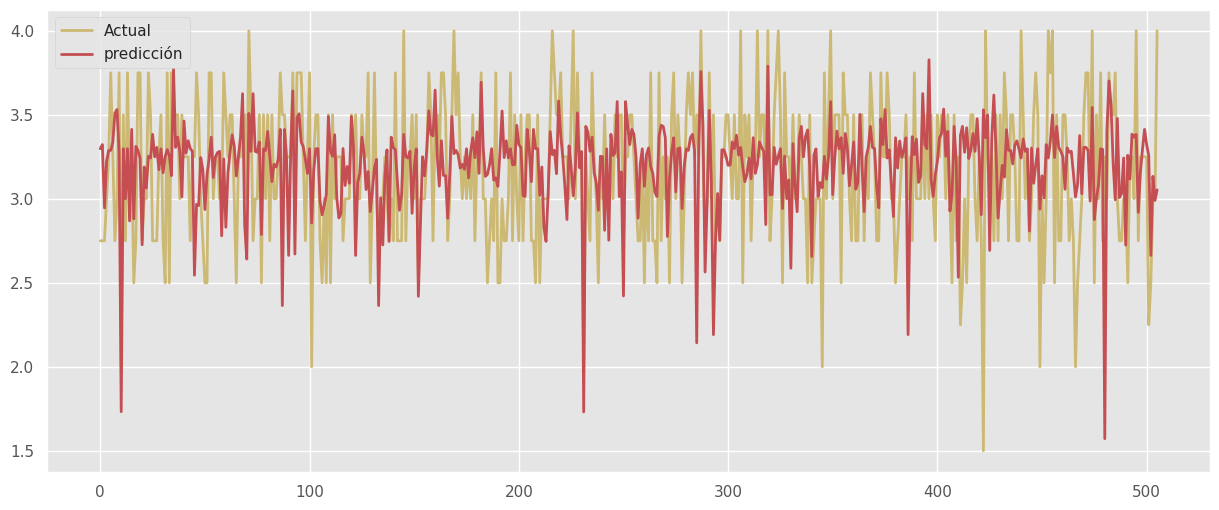

In [117]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

# Comparación de los resultados de los modelos

In [141]:
modelos = pd.DataFrame({
    'Model': ["Regresión Lineal","KNN", "Random Forest","SVR", "Arbol Decisión"] ,
     "R2":[r2_score(y_test, y_pred_lr)*100 ,r2_score(y_test, y_pred_knn)*100 ,r2_score(y_test, y_pred_rf)*100,
           r2_score(y_test, y_pred_svr)*100, r2_score(y_test, y_pred_dtr)*100],
     "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)) ,np.sqrt(mean_squared_error(y_test, y_pred_knn))
                   ,np.sqrt(mean_squared_error(y_test, y_pred_rf)), np.sqrt(mean_squared_error(y_test, y_pred_svr)),
              np.sqrt(mean_squared_error(y_test, y_pred_dtr))]   })

modelos

,Model,R2,RMSE
0,Regresión Lineal,-4.176470,0.428046
1,KNN,-4.602474,0.428920
2,Random Forest,1.987112,0.415190
3,SVR,-1.618732,0.422758
4,Arbol Decisión,8.284919,0.401630


In [144]:
fig = px.bar (modelos, x="Model",
                   y="R2",
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'],
                   title='R2')
fig.update_layout(bargap=0.6)
fig.show();

In [146]:
fig = px.bar (modelos, x="Model",
                   y="RMSE",
                       template = "plotly_dark",
                   color_discrete_sequence=[ 'blue'],
                   title='RMSE')
fig.update_layout(bargap=0.6)
fig.show();

# Support Vector Regresión aplicanda una modelación de hiper parámetro

In [150]:
# normalizamos los datos
target_name ="Rating"
robust_scaler = RobustScaler()

X = data.drop("Rating", axis=1)
# Eliminamos las variables categoricas
numerical = X.drop(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics'], axis = 1)
# Variable categoricas
categorical = X.filter(['Review Date', 'Ingredients'])

cat_numerical = pd.get_dummies(categorical,drop_first=True)

X = pd.concat([numerical, cat_numerical], axis = 1)

# Dividimos los datos en etiquetas

feature_names = X.columns
X = robust_scaler.fit_transform(X)
y = data[target_name]

# Dividimos los datos en entrenamiento y en datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [153]:
# Entrenando nuestro modelo
regressor = svm_reg.fit(X_train, y_train)

# Haciendo la predicciones
y_pred_svr_hiper = regressor.predict(X_test)

In [154]:
print('Testing R2 Score: ', r2_score(y_test, y_pred_svr_hiper)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_svr_hiper)))
print('Testing MAE: ', mean_absolute_error(y_test, y_pred_svr_hiper))
print('Testing MSE: ', mean_squared_error(y_test, y_pred_svr_hiper))

Testing R2 Score:  6.107783804740818
Testing RMSE:  0.4208724399002673
Testing MAE:  0.33400111908693747
Testing MSE:  0.1771336106676041


In [183]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.25).fit(X_train, y_train)
pred_svr = model.predict(X_test)

In [184]:
print('Testing R2 Score: ', r2_score(y_test, pred_svr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_svr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_svr))
print('Testing MSE: ', mean_squared_error(y_test, pred_svr))

Testing R2 Score:  7.50102442887044
Testing RMSE:  0.4177381644244569
Testing MAE:  0.33178990896077415
Testing MSE:  0.17450517401671456
